In [7]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS

from sklearn.tree import (DecisionTreeClassifier as DTC, DecisionTreeRegressor as DTR, plot_tree, export_text)
from sklearn.metrics import (accuracy_score,log_loss)
from sklearn.ensemble import (RandomForestRegressor as RF,GradientBoostingRegressor as GBR)
from ISLP.bart import BART



In [9]:
Carseats = load_data('Carseats')
High = np.where(Carseats.Sales > 8,'Yes','No')

In [10]:
model = MS(Carseats.columns.drop('Sales'),intercept=False)
D = model.fit_transform(Carseats)
feature_names = list(D.columns)
X = np.asarray(D)

In [12]:
clf = DTC(criterion='entropy',max_depth=3,random_state=0)
clf.fit(X,High)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [14]:
accuracy_score(High,clf.predict(X))

0.79

[Text(0.5, 0.875, 'ShelveLoc[Good] <= 0.5\nentropy = 0.977\nsamples = 400\nvalue = [236, 164]'),
 Text(0.25, 0.625, 'Price <= 92.5\nentropy = 0.894\nsamples = 315\nvalue = [217, 98]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Income <= 57.0\nentropy = 0.887\nsamples = 46\nvalue = [14, 32]'),
 Text(0.0625, 0.125, 'entropy = 0.881\nsamples = 10\nvalue = [7, 3]'),
 Text(0.1875, 0.125, 'entropy = 0.711\nsamples = 36\nvalue = [7, 29]'),
 Text(0.375, 0.375, 'Advertising <= 13.5\nentropy = 0.804\nsamples = 269\nvalue = [203, 66]'),
 Text(0.3125, 0.125, 'entropy = 0.687\nsamples = 224\nvalue = [183, 41]'),
 Text(0.4375, 0.125, 'entropy = 0.991\nsamples = 45\nvalue = [20, 25]'),
 Text(0.75, 0.625, 'Price <= 135.0\nentropy = 0.767\nsamples = 85\nvalue = [19, 66]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'US[Yes] <= 0.5\nentropy = 0.523\nsamples = 68\nvalue = [8, 60]'),
 Text(0.5625, 0.125, 'entropy = 0.937\nsamples = 17\nvalue = [6, 11]'),
 Text(0.6875, 0.125, 'entropy = 0.

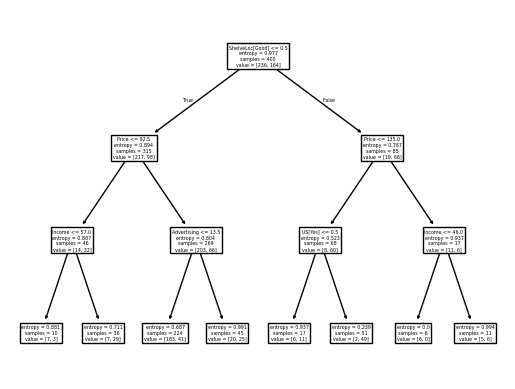

In [16]:
ax = subplots()[1]
plot_tree(clf,feature_names=feature_names,ax=ax)

In [17]:
print(export_text(clf,feature_names=feature_names,show_weights=True))

|--- ShelveLoc[Good] <= 0.50
|   |--- Price <= 92.50
|   |   |--- Income <= 57.00
|   |   |   |--- weights: [7.00, 3.00] class: No
|   |   |--- Income >  57.00
|   |   |   |--- weights: [7.00, 29.00] class: Yes
|   |--- Price >  92.50
|   |   |--- Advertising <= 13.50
|   |   |   |--- weights: [183.00, 41.00] class: No
|   |   |--- Advertising >  13.50
|   |   |   |--- weights: [20.00, 25.00] class: Yes
|--- ShelveLoc[Good] >  0.50
|   |--- Price <= 135.00
|   |   |--- US[Yes] <= 0.50
|   |   |   |--- weights: [6.00, 11.00] class: Yes
|   |   |--- US[Yes] >  0.50
|   |   |   |--- weights: [2.00, 49.00] class: Yes
|   |--- Price >  135.00
|   |   |--- Income <= 46.00
|   |   |   |--- weights: [6.00, 0.00] class: No
|   |   |--- Income >  46.00
|   |   |   |--- weights: [5.00, 6.00] class: Yes



In [19]:
validation = skm.ShuffleSplit(n_splits=1,test_size=200,random_state=0)
results = skm.cross_validate(clf,D,High,cv=validation)
results['test_score']

array([0.685])

In [20]:
(X_train,X_test,High_train,High_test) =skm.train_test_split(X,High,test_size=0.5,random_state=0)

In [21]:
clf = DTC(criterion='entropy',random_state=0)
clf.fit(X_train,High_train)
accuracy_score(High_test,clf.predict(X_test))

0.735

In [22]:
ccp_path = clf.cost_complexity_pruning_path(X_train,High_train)
kfold = skm.KFold(10,random_state=1,shuffle=True)

In [24]:
grid = skm.GridSearchCV(clf,{'ccp_alpha':ccp_path.ccp_alphas},refit=True,cv=kfold,scoring='accuracy')
grid.fit(X_train,High_train)
grid.best_score_

np.float64(0.685)

[Text(0.4345703125, 0.95, 'Price <= 94.5\nentropy = 0.977\nsamples = 200\nvalue = [118, 82]'),
 Text(0.1875, 0.85, 'CompPrice <= 118.5\nentropy = 0.769\nsamples = 40\nvalue = [9, 31]'),
 Text(0.31103515625, 0.8999999999999999, 'True  '),
 Text(0.15625, 0.75, 'Price <= 86.5\nentropy = 0.894\nsamples = 29\nvalue = [9, 20]'),
 Text(0.09375, 0.65, 'Income <= 60.0\nentropy = 0.523\nsamples = 17\nvalue = [2, 15]'),
 Text(0.0625, 0.55, 'Advertising <= 5.0\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(0.03125, 0.45, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.09375, 0.45, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.125, 0.55, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.21875, 0.65, 'Population <= 212.5\nentropy = 0.98\nsamples = 12\nvalue = [7, 5]'),
 Text(0.1875, 0.55, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.25, 0.55, 'Income <= 36.5\nentropy = 0.954\nsamples = 8\nvalue = [3, 5]'),
 Text(0.21875, 0.45, 'entropy = 0.0\nsamples = 3\nval

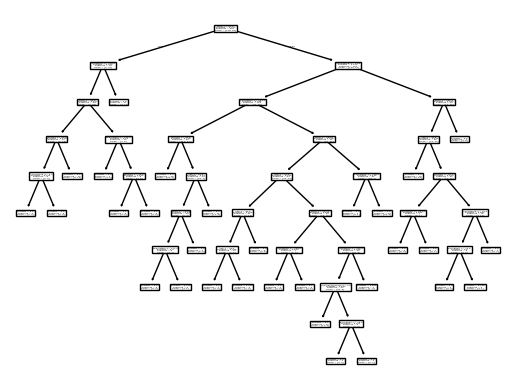

In [27]:
ax = subplots()[1]
best_ = grid.best_estimator_
plot_tree(best_,feature_names=feature_names,ax=ax)

In [28]:
best_.tree_.n_leaves

np.int64(30)

In [30]:
print(accuracy_score(High_test,best_.predict(X_test)))
confusion = confusion_table(best_.predict(X_test),High_test)
confusion

0.72


Truth,No,Yes
Predicted,,
No,94,32
Yes,24,50


In [31]:
Boston = load_data('Boston')
model = MS(Boston.columns.drop('medv'),intercept=False)
D = model.fit_transform(Boston)
feature_names = list(D.columns)
X = np.asarray(D)

In [32]:
(X_train,X_test,y_train,y_test) = skm.train_test_split(X,Boston['medv'],test_size=0.3,random_state=0)

[Text(0.5, 0.875, 'rm <= 6.797\nsquared_error = 84.765\nsamples = 354\nvalue = 22.745'),
 Text(0.25, 0.625, 'lstat <= 14.405\nsquared_error = 35.011\nsamples = 284\nvalue = 19.614'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'dis <= 1.474\nsquared_error = 20.776\nsamples = 167\nvalue = 22.981'),
 Text(0.0625, 0.125, 'squared_error = 0.0\nsamples = 2\nvalue = 50.0'),
 Text(0.1875, 0.125, 'squared_error = 12.072\nsamples = 165\nvalue = 22.653'),
 Text(0.375, 0.375, 'crim <= 5.782\nsquared_error = 16.049\nsamples = 117\nvalue = 14.808'),
 Text(0.3125, 0.125, 'squared_error = 10.345\nsamples = 67\nvalue = 16.872'),
 Text(0.4375, 0.125, 'squared_error = 10.334\nsamples = 50\nvalue = 12.042'),
 Text(0.75, 0.625, 'rm <= 7.435\nsquared_error = 85.388\nsamples = 70\nvalue = 35.451'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'crim <= 7.393\nsquared_error = 44.147\nsamples = 47\nvalue = 30.921'),
 Text(0.5625, 0.125, 'squared_error = 19.597\nsamples = 43\nvalue = 32.465'),
 Text

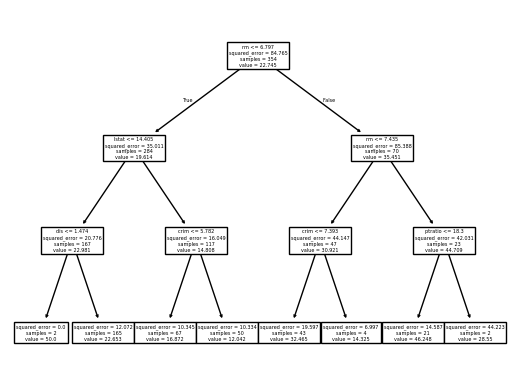

In [34]:
reg = DTR(max_depth=3)
reg.fit(X_train,y_train)
ax = subplots()[1]
plot_tree(reg,feature_names=feature_names,ax=ax)

In [37]:
ccp_path = reg.cost_complexity_pruning_path(X_train,y_train)
kfold = skm.KFold(5,shuffle=True,random_state=10)
grid = skm.GridSearchCV(reg,{'ccp_alpha':ccp_path.ccp_alphas},refit=True,cv=kfold,scoring='neg_mean_squared_error')
G = grid.fit(X_train,y_train)

In [39]:
best_ = grid.best_estimator_
np.mean((y_test-best_.predict(X_test))**2)

np.float64(28.069857549754044)

[Text(0.5, 0.875, 'rm <= 6.797\nsquared_error = 84.765\nsamples = 354\nvalue = 22.745'),
 Text(0.25, 0.625, 'lstat <= 14.405\nsquared_error = 35.011\nsamples = 284\nvalue = 19.614'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'dis <= 1.474\nsquared_error = 20.776\nsamples = 167\nvalue = 22.981'),
 Text(0.0625, 0.125, 'squared_error = 0.0\nsamples = 2\nvalue = 50.0'),
 Text(0.1875, 0.125, 'squared_error = 12.072\nsamples = 165\nvalue = 22.653'),
 Text(0.375, 0.375, 'crim <= 5.782\nsquared_error = 16.049\nsamples = 117\nvalue = 14.808'),
 Text(0.3125, 0.125, 'squared_error = 10.345\nsamples = 67\nvalue = 16.872'),
 Text(0.4375, 0.125, 'squared_error = 10.334\nsamples = 50\nvalue = 12.042'),
 Text(0.75, 0.625, 'rm <= 7.435\nsquared_error = 85.388\nsamples = 70\nvalue = 35.451'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'crim <= 7.393\nsquared_error = 44.147\nsamples = 47\nvalue = 30.921'),
 Text(0.5625, 0.125, 'squared_error = 19.597\nsamples = 43\nvalue = 32.465'),
 Text

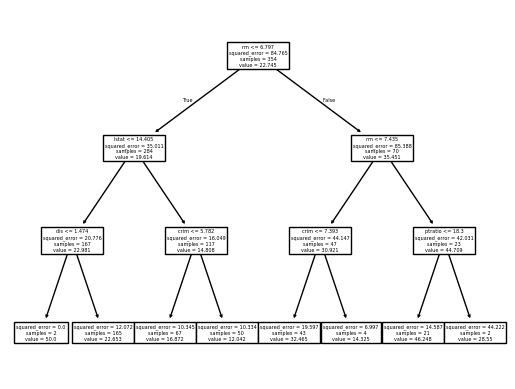

In [44]:
ax = subplots()[1]
plot_tree(G.best_estimator_,feature_names=feature_names,ax=ax)

In [45]:
# Bagging and Random Forests
bag_boston = RF(max_features=X_train.shape[1],random_state=0)
bag_boston.fit(X_train,y_train)

RandomForestRegressor(max_features=12, random_state=0)

np.float64(14.634700151315787)

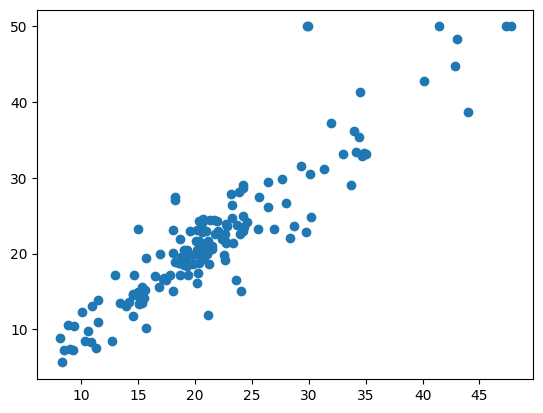

In [46]:
ax = subplots()[1]
y_hat_bag = bag_boston.predict(X_test)
ax.scatter(y_hat_bag,y_test)
np.mean((y_test-y_hat_bag)**2)

In [47]:
RF_boston = RF(max_features=6,random_state=0)
RF_boston.fit(X_train,y_train)
y_hat_RF = RF_boston.predict(X_test)
np.mean((y_test-y_hat_RF)**2)

np.float64(20.04276446710527)

In [48]:
feature_imp = pd.DataFrame({'importance':RF_boston.feature_importances_},index=feature_names)
feature_imp.sort_values(by='importance',ascending=False)

,importance
lstat,0.356203
rm,0.332163
ptratio,0.067270
crim,0.055404
indus,0.053851
dis,0.041582
nox,0.035225
tax,0.025355
age,0.021506
rad,0.004784


In [49]:
# Boosting
boost_boston = GBR(n_estimators=5000,learning_rate=0.001,max_depth=3,random_state=0)
boost_boston.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.001, n_estimators=5000,
                          random_state=0)

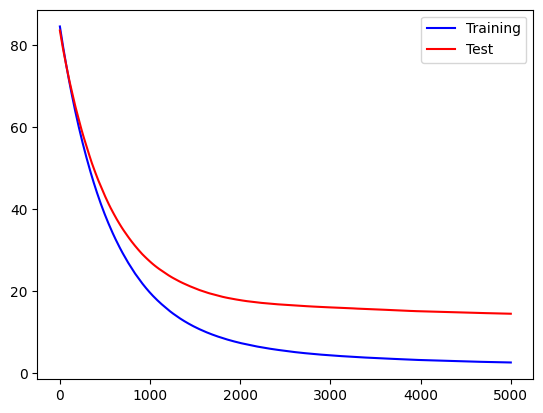

In [52]:
test_error = np.zeros_like(boost_boston.train_score_)
for idx, y_ in enumerate(boost_boston.staged_predict(X_test)):
    test_error[idx] = np.mean((y_test-y_)**2)

plot_idx = np.arange(boost_boston.train_score_.shape[0])
ax = subplots()[1]
ax.plot(plot_idx,boost_boston.train_score_,'b',label='Training')
ax.plot(plot_idx,test_error,'r',label='Test')
ax.legend()

In [53]:
y_hat_boost = boost_boston.predict(X_test)
np.mean((y_test-y_hat_boost)**2)

np.float64(14.481405918831591)

In [54]:
boost_boston = GBR(n_estimators=5000,learning_rate=0.2,max_depth=3,random_state=0)
boost_boston.fit(X_train,y_train)
y_hat_boost = boost_boston.predict(X_test)
np.mean((y_test-y_hat_boost)**2)

np.float64(14.501514553719565)

In [55]:
# BART
bart_boston = BART(random_state=0,burnin=5,ndraw=15)
bart_boston.fit(X_train,y_train)

BART(burnin=5, ndraw=15, random_state=0)

In [58]:
y_hat_test = bart_boston.predict(X_test.astype(np.float32))
np.mean((y_test-y_hat_test)**2)

np.float64(22.145009458109232)

In [59]:
var_inclusion = pd.Series(bart_boston.variable_inclusion_.mean(0),index=D.columns)
var_inclusion

crim       26.933333
zn         27.866667
indus      26.466667
chas       22.466667
nox        26.600000
rm         29.800000
age        22.733333
dis        26.466667
rad        23.666667
tax        24.133333
ptratio    24.266667
lstat      31.000000
dtype: float64